In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

In [80]:
release_dates = pd.read_csv('/Users/henrywzh/Documents/data/cpi_release_date.csv')
release_dates['Release Date'] = pd.to_datetime(release_dates['Release Date'])
release_dates['Year'] = release_dates['Release Date'].dt.year
release_dates['Month'] = release_dates['Release Date'].dt.month
release_dates

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/67244580.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  release_dates['Release Date'] = pd.to_datetime(release_dates['Release Date'])


,Release Date,Year,Month
0,1949-03-24,1949,3
1,1949-04-22,1949,4
2,1949-05-23,1949,5
3,1949-06-24,1949,6
4,1949-07-22,1949,7
...,...,...,...
921,2024-04-10,2024,4
922,2024-05-15,2024,5
923,2024-06-12,2024,6
924,2024-07-11,2024,7


In [81]:
df = pd.read_csv('/Users/henrywzh/Documents/data/us_inflation.csv')
df.drop(columns=['Ave'], inplace=True)

month_to_int = { df.columns[i + 1]: i + 1 for i in range(len(df.columns) - 1)}
df = pd.melt(
    df, 
    id_vars='Year', 
    value_vars=list(df.columns[1:]), 
    var_name='Month', 
    value_name='CPI')
df.dropna(inplace=True)
df['Year'] = [int(y) for y in df['Year']]
df['Month'] = [month_to_int[m] for m in df['Month']]
dates = [f"{df['Year'].iloc[i]}-{df['Month'].iloc[i]}-25" for i in range(df.shape[0])]
df.index = pd.to_datetime(dates)
# df.to_csv('/Users/henrywzh/Documents/data/us_inflation_ts.csv')

In [82]:
df = pd.merge(df, release_dates, on=['Year', 'Month'])
df.sort_values(by='Release Date', inplace=True)
release_dates = df['Release Date']
cpi_df = df.copy()
# df.to_csv('/Users/henrywzh/Documents/data/us_cpi_with_release_dates.csv')

In [83]:
start_date = '1987-01-01'
end_date = '2024-08-19'
major_markets = ['^HSI', '^GSPC']
df = yf.download(major_markets, start_date, end_date)
df_close = df['Close']
df_close

[*********************100%%**********************]  2 of 2 completed


Ticker,^GSPC,^HSI
Date,,
1987-01-02,246.449997,2540.100098
1987-01-05,252.190002,2552.399902
1987-01-06,252.779999,2583.899902
1987-01-07,255.330002,2607.100098
1987-01-08,257.279999,2603.300049
...,...,...
2024-08-12,5344.390137,17111.650391
2024-08-13,5434.430176,17174.060547
2024-08-14,5455.209961,17113.359375


In [131]:
# split into periods of data according to cpi release date
df_list = []
for (i, d) in enumerate(release_dates):
    if i == len(release_dates) - 1:
        break
    
    # -- use the mid point between this cpi release day and the next release day
    # nd = release_dates.iloc[i + 1]
    # this_day = datetime(d.year, d.month, d.day)
    # next_day = datetime(nd.year, nd.month, nd.day)
    # next_date = this_day + (next_day - this_day) / 2
    
    # -- use the day before the next release day
    # next_date = nd
    
    # -- use the 5 day after this release day
    next_date = pd.to_datetime(d + pd.Timedelta(days=3))
    
    # next_date = release_dates.iloc[i + 1]
    temp_df = df_close[(df_close.index >= d) & (df_close.index <= next_date)]
    temp_df.index.name = d
    if temp_df.shape[0] == 0:
        continue
        
    df_list.append(temp_df)

1949-03-27 00:00:00 1949-03-24 00:00:00
1949-04-25 00:00:00 1949-04-22 00:00:00
1949-05-26 00:00:00 1949-05-23 00:00:00
1949-06-27 00:00:00 1949-06-24 00:00:00
1949-07-25 00:00:00 1949-07-22 00:00:00
1949-08-29 00:00:00 1949-08-26 00:00:00
1949-10-01 00:00:00 1949-09-28 00:00:00
1949-10-31 00:00:00 1949-10-28 00:00:00
1949-12-01 00:00:00 1949-11-28 00:00:00
1949-12-31 00:00:00 1949-12-28 00:00:00
1950-01-29 00:00:00 1950-01-26 00:00:00
1950-02-27 00:00:00 1950-02-24 00:00:00
1950-03-28 00:00:00 1950-03-25 00:00:00
1950-04-25 00:00:00 1950-04-22 00:00:00
1950-05-23 00:00:00 1950-05-20 00:00:00
1950-06-28 00:00:00 1950-06-25 00:00:00
1950-07-25 00:00:00 1950-07-22 00:00:00
1950-08-26 00:00:00 1950-08-23 00:00:00
1950-09-27 00:00:00 1950-09-24 00:00:00
1950-10-27 00:00:00 1950-10-24 00:00:00
1950-12-02 00:00:00 1950-11-29 00:00:00
1950-12-26 00:00:00 1950-12-23 00:00:00
1951-01-28 00:00:00 1951-01-25 00:00:00
1951-03-05 00:00:00 1951-03-02 00:00:00
1951-03-27 00:00:00 1951-03-24 00:00:00


In [132]:
# get the cumulative return 
cumulative_rets = []
dates = []

for _df in df_list:
    _df.dropna(inplace=True)
    cumulative_rets.append(_df['^HSI'].iloc[0] / _df['^HSI'].iloc[-1] - 1)
    dates.append(_df.index.name)

after_cpi_release = pd.DataFrame(data={'Return after CPI release': cumulative_rets, 'Release Date': dates})

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/382742048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


IndexError: single positional indexer is out-of-bounds

In [143]:
final_df = pd.merge(after_cpi_release, cpi_df, on='Release Date')
final_df

,Return after CPI release,Release Date,Year,Month,CPI
0,-0.014778,1986-11-25,1986,11,1.3
1,-0.049933,1986-12-19,1986,12,1.1
2,-0.078615,1987-01-21,1987,1,1.5
3,0.057624,1987-02-27,1987,2,2.1
4,-0.025590,1987-03-27,1987,3,3.0
...,...,...,...,...,...
465,-0.017324,2024-01-11,2024,1,3.1
466,-0.048051,2024-02-09,2024,2,3.2
467,-0.050566,2024-02-13,2024,2,3.2
468,-0.037692,2024-03-12,2024,3,3.5


0.12469479025855768

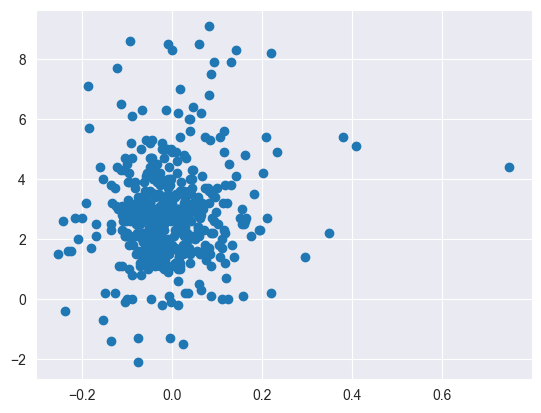

In [144]:
plt.scatter(final_df['Return after CPI release'], final_df['CPI'])
final_df['Return after CPI release'].corr(final_df['CPI'])

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


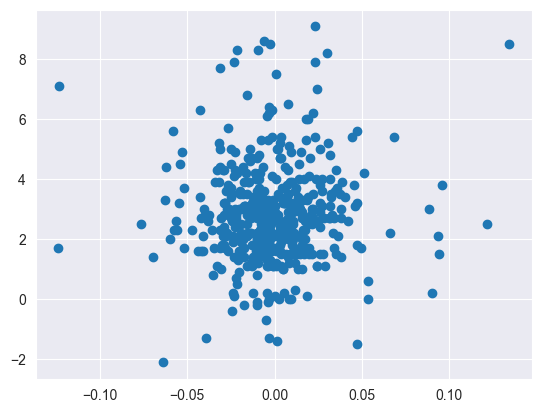

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


0.03782806759852616


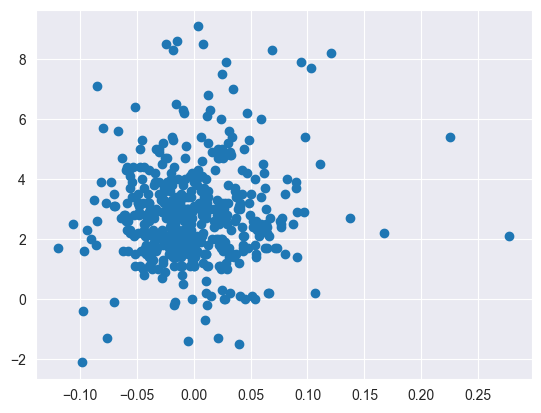

0.0669299848385189


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


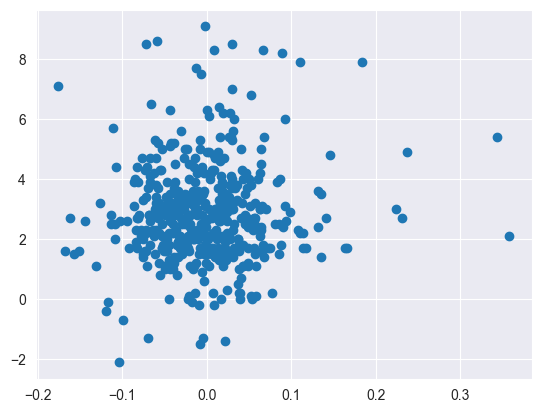

0.07633835074085164


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


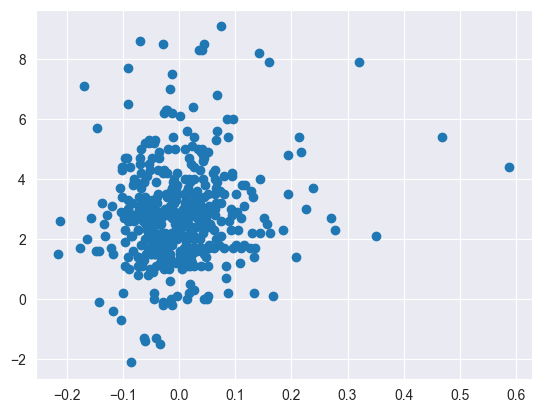

0.14069364029997108


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


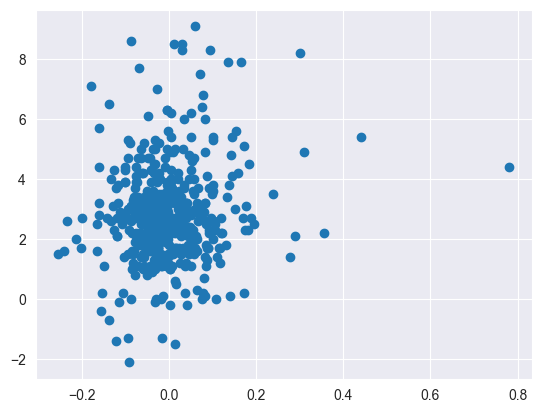

0.1369381191235658


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


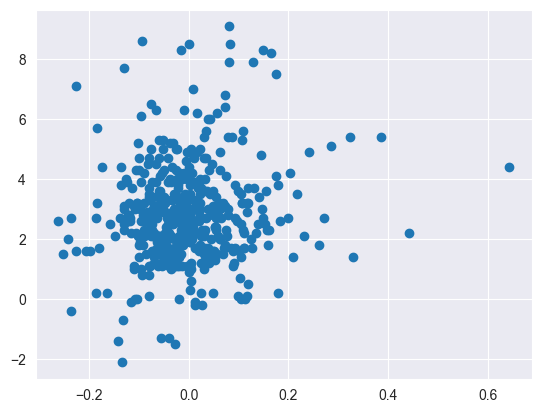

0.13324327978743358


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


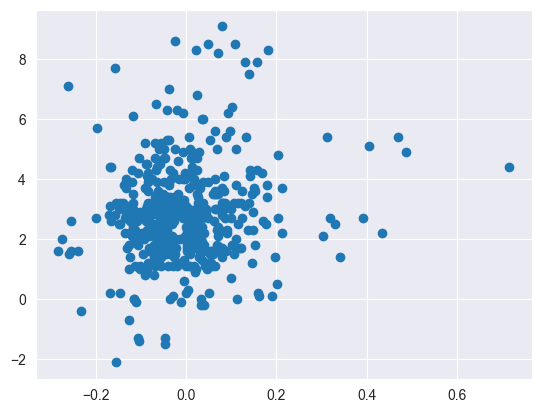

0.14654263699148384


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


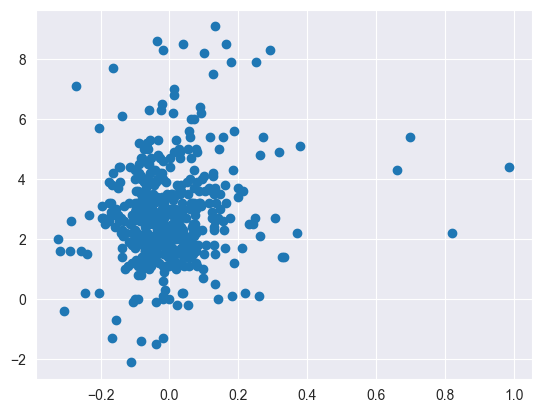

0.16126335421022409


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


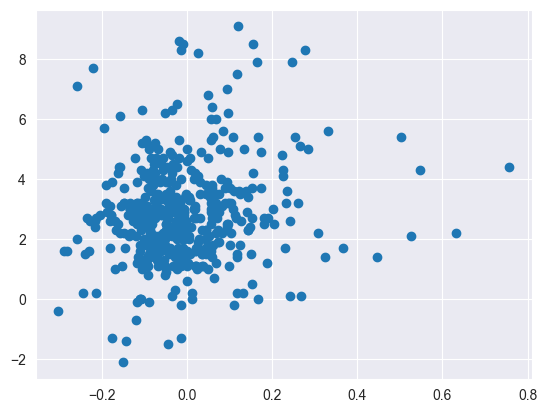

0.1524675470974477


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


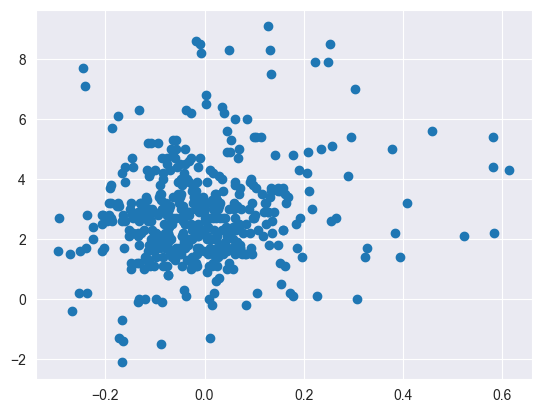

0.169881193472975


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


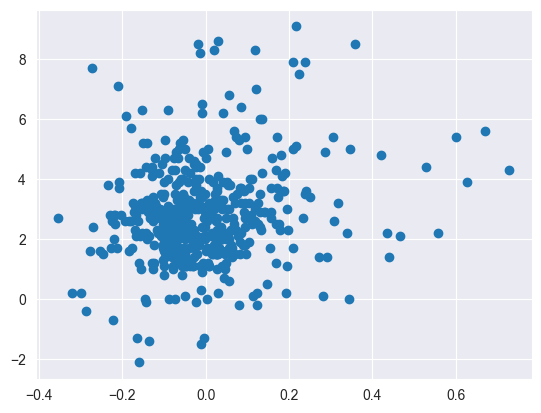

0.18032560075242626


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


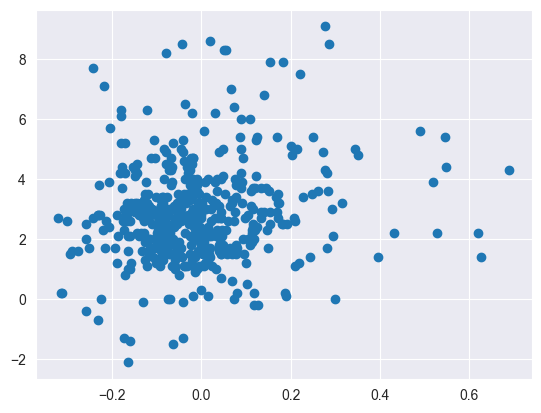

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


0.15978683314035608


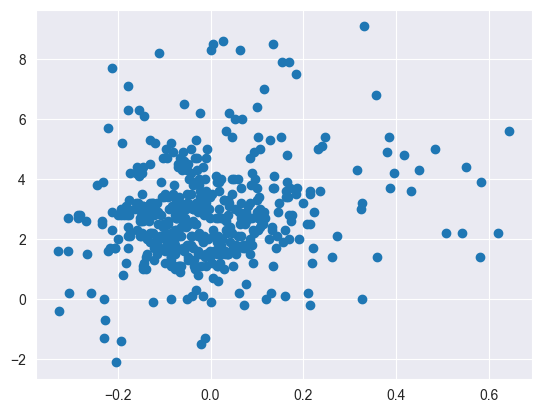

0.1787019917388326


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


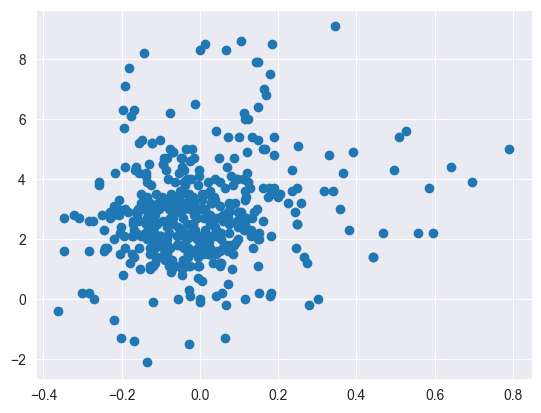

0.17603920336957593


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


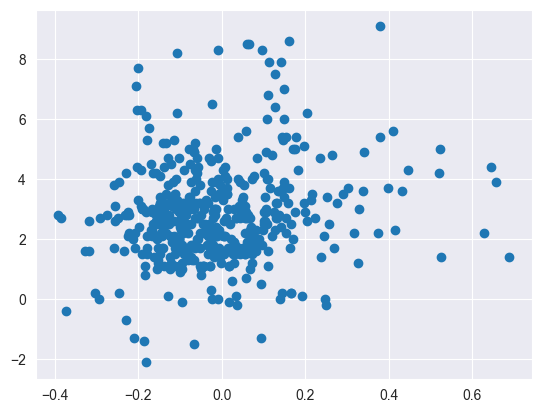

0.1613737953732655


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


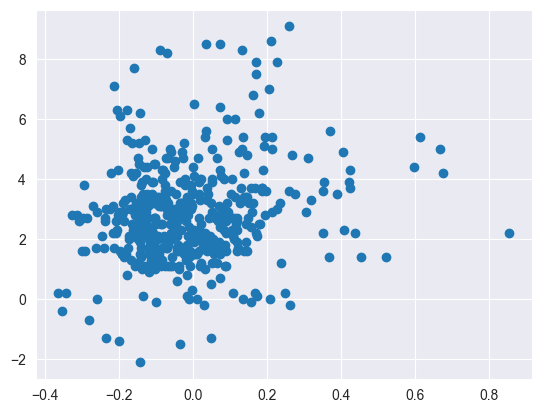

0.1815543047768847


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


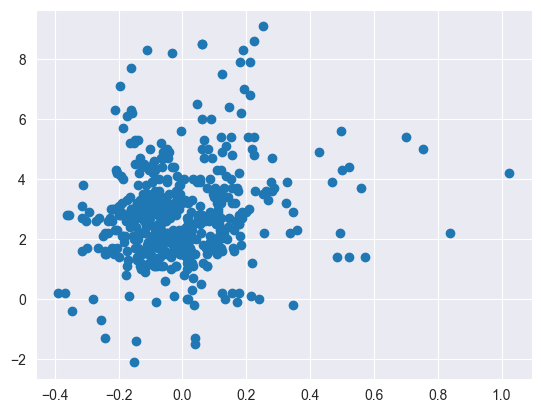

0.17993627595867503


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


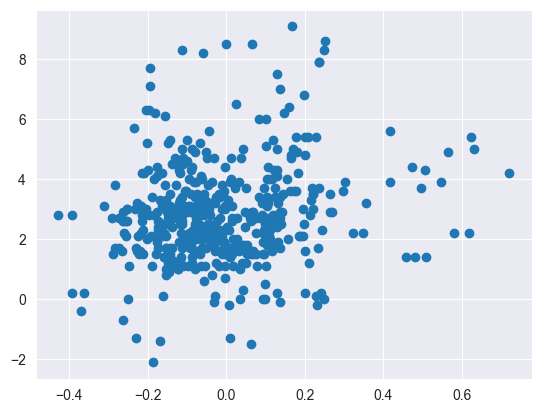

0.1704951780704144


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


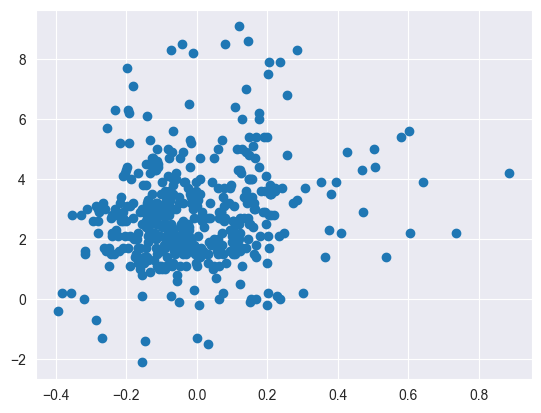

0.17616891583665434


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


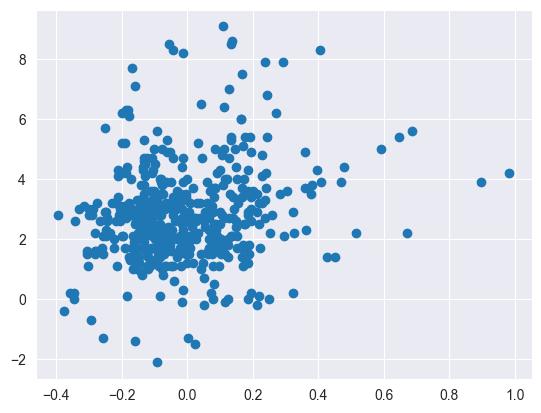

0.1899985594757974


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


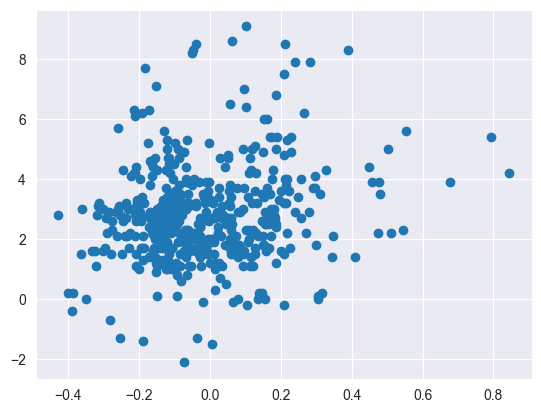

0.1803813277072948


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


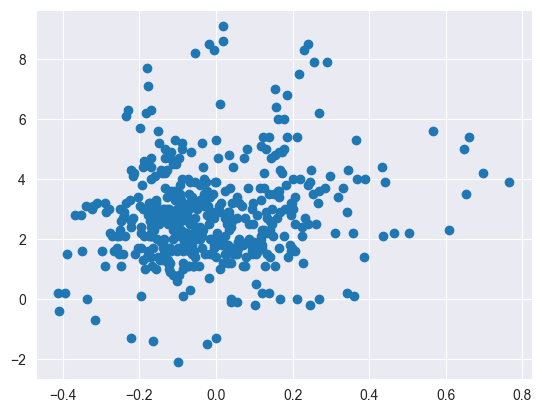

0.1751290194678327


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


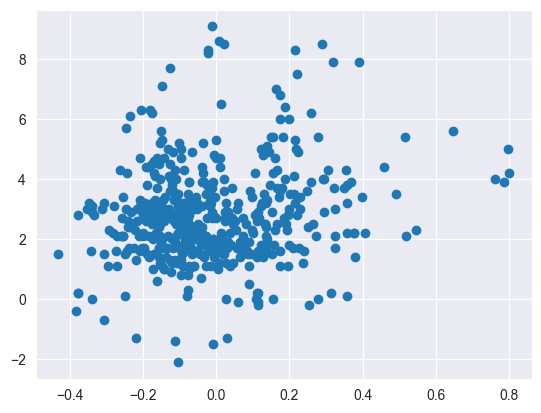

0.17969305024525978


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


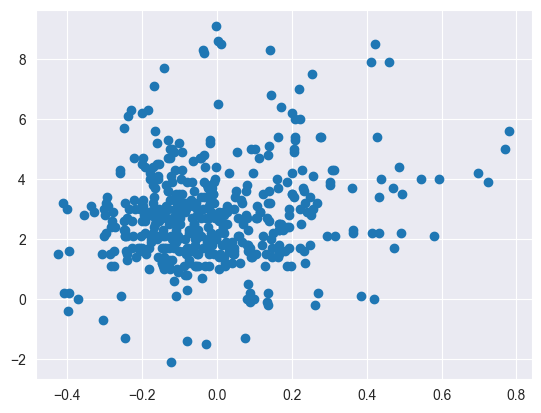

0.17503213386444122


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_44801/716340041.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.dropna(inplace=True)


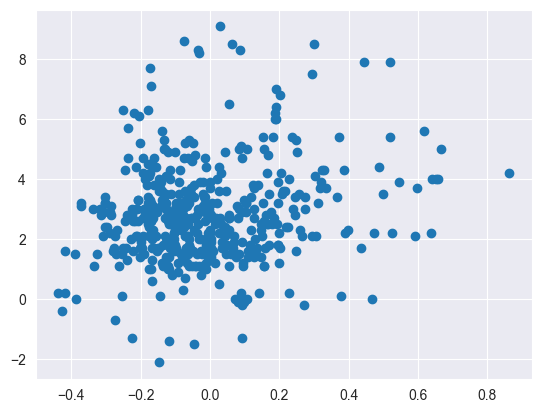

0.1816640401267008


In [151]:
for test_days in range(10, 251, 10): 
    # split into periods of data according to cpi release date
    df_list = []
    for (i, d) in enumerate(release_dates):
        if i == len(release_dates) - 1:
            break
        
        # -- use the mid point between this cpi release day and the next release day
        # nd = release_dates.iloc[i + 1]
        # this_day = datetime(d.year, d.month, d.day)
        # next_day = datetime(nd.year, nd.month, nd.day)
        # next_date = this_day + (next_day - this_day) / 2
        
        # -- use the day before the next release day
        # next_date = nd
        
        # -- use the 5 day after this release day
        next_date = pd.to_datetime(d + pd.Timedelta(days=test_days))
        
        # next_date = release_dates.iloc[i + 1]
        temp_df = df_close[(df_close.index >= d) & (df_close.index <= next_date)]
        temp_df.index.name = d
        if temp_df.shape[0] == 0:
            continue
            
        df_list.append(temp_df)
        
    # get the cumulative return 
    cumulative_rets = []
    dates = []
    
    for _df in df_list:
        _df.dropna(inplace=True)
        cumulative_rets.append(_df['^HSI'].iloc[0] / _df['^HSI'].iloc[-1] - 1)
        dates.append(_df.index.name)
    
    after_cpi_release = pd.DataFrame(data={'Return after CPI release': cumulative_rets, 'Release Date': dates})
    
    final_df = pd.merge(after_cpi_release, cpi_df, on='Release Date')
    
    plt.scatter(final_df['Return after CPI release'], final_df['CPI'])
    plt.show()
    print(final_df['Return after CPI release'].corr(final_df['CPI']))